# **Importing Packages**

---

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

# **Importing Project Data**

---

Importing Avaiation_Data.csv:

In [3]:
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

Identify **column names** and how many cells are **empty**:

In [4]:
df.isna().sum().sort_values(ascending=False)

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40099
Airport.Name              37558
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8536
Report.Status              7840
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2776
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

# **Cleaning Data**

---

Adjusts all columns titles to lower-case + replaces the " . " with " _ ":

In [5]:
df = df.rename(columns={c: c.lower().replace('.', '_') for c in df.columns})

Selecting all of the columns needed and using the same Data Frame name 'df':

In [6]:
df = df[['location','investigation_type','event_date','country','injury_severity','aircraft_damage','aircraft_category','make', 'model','number_of_engines', 'engine_type', 'air_carrier', 'total_fatal_injuries', 'total_uninjured', 'total_serious_injuries', 'total_minor_injuries','weather_condition', 'airport_code', 'airport_name', 'latitude','longitude', 'amateur_built']]



Clean country to make lowercase + Refining to **'United States'**:

In [7]:
df['country'] = df['country'].str.lower()

In [8]:
df = df[df['country'] == 'united states']

Cleaning '**location**' + adding '**state**' column:

In [9]:
df['location'] = df['location'].str.lower()
df['state'] = df['location'].str[-2:]
df.dropna(subset=['location'], inplace=True)

show 'states' list:

In [10]:
list(df['state'].value_counts().items())

[('ca', 8857),
 ('tx', 5913),
 ('fl', 5825),
 ('ak', 5672),
 ('az', 2834),
 ('co', 2726),
 ('wa', 2613),
 ('il', 2060),
 ('mi', 2030),
 ('ga', 2023),
 ('ny', 1915),
 ('oh', 1823),
 ('pa', 1790),
 ('or', 1772),
 ('nc', 1661),
 ('mo', 1565),
 ('wi', 1560),
 ('ar', 1519),
 ('mn', 1456),
 ('id', 1436),
 ('nm', 1358),
 ('ut', 1336),
 ('in', 1320),
 ('va', 1275),
 ('ok', 1240),
 ('nv', 1236),
 ('la', 1216),
 ('nj', 1170),
 ('al', 1153),
 ('tn', 1108),
 ('ks', 1104),
 ('mt', 1050),
 ('sc', 974),
 ('ma', 969),
 ('ia', 819),
 ('md', 815),
 ('ms', 813),
 ('wy', 739),
 ('ne', 725),
 ('ky', 650),
 ('nd', 561),
 ('me', 505),
 ('ct', 502),
 ('hi', 499),
 ('sd', 446),
 ('wv', 394),
 ('nh', 368),
 ('vt', 241),
 ('ri', 158),
 ('de', 114),
 ('pr', 114),
 ('gm', 44),
 ('dc', 42),
 ('of', 17),
 ('ao', 17),
 ('n,', 15),
 ('po', 14),
 ('o,', 12),
 ('a,', 8),
 ('gu', 8),
 ('vi', 6),
 ('g,', 5),
 ('x,', 3),
 (',', 3),
 ('9,', 3),
 ('un', 3),
 ('e,', 3),
 ('d,', 2),
 ('c,', 1),
 ('i,', 1),
 ('h,', 1),
 ('y,', 

(2) **Investigation_Type**:

In [11]:
print(f"Accidents: {df['investigation_type'].value_counts()['Accident']}")
print(f"Incidents: {df['investigation_type'].value_counts()['Incident']}")
# What is the difference????

Accidents: 79895
Incidents: 2342


Filtering '**Event_date**' to 2001-11-19 and greater: 

In [12]:
df = df[df['event_date'] >= '2001-11-19']

Examining '**injury_severity**' data: 

In [13]:
df['injury_severity'].value_counts()

# Not sure what minor/incident/'49' means...

Non-Fatal    25564
Fatal         3556
Fatal(1)      1096
Fatal(2)       629
Incident       334
Minor          203
Fatal(3)       191
Serious        153
Fatal(4)        99
Fatal(5)        39
Fatal(6)        10
Fatal(7)         3
Fatal(8)         2
Fatal(10)        2
Fatal(49)        1
Fatal(20)        1
Fatal(13)        1
Fatal(21)        1
Name: injury_severity, dtype: int64

Examining '**aircraft_damage**' data:

In [14]:
df['aircraft_damage'].value_counts()

# Posibly combine all of these? Why does the breakdown matter?

Substantial    26826
Destroyed       3530
Minor            717
Unknown           50
Name: aircraft_damage, dtype: int64

Examining '**aircraft_category**' data + refine to **airplanes** only:

In [36]:
print('1.')
print(f"** {df['aircraft_category'].isna().sum()} empty cells in this column") # 7625 empy cells
print()
df = df[df['aircraft_category'] == 'Airplane']
print()
print('2.')
print(df['aircraft_category'].value_counts())


1.
** 0 empty cells in this column


2.
Airplane    17980
Name: aircraft_category, dtype: int64


Examining '**number_of_engines**' data: 

In [37]:
print('1)')
print(f"** {df['number_of_engines'].isna().sum()} empty cells in this column") # 1053 empy cells
print()
print()
print()
print('2)')
print(df['number_of_engines'].value_counts())

1)
** 482 empty cells in this column



2)
1.0    15108
2.0     2327
4.0       38
3.0       20
0.0        3
6.0        1
8.0        1
Name: number_of_engines, dtype: int64


Cleaning '**make' & 'model**':

In [38]:
## make
df['make'] = df['make'].str.lower()
df['make'].value_counts(ascending=False) 


cessna                          6348
piper                           3576
beech                           1252
boeing                           397
mooney                           336
                                ... 
medway                             1
storch                             1
brewster fleet                     1
paradise aircraft usa llc          1
north american aviation div.       1
Name: make, Length: 973, dtype: int64

In [39]:
# dropping 13 missing items:
df.dropna(subset=['make'], inplace=True)

df['make'].isna().sum()

0

In [40]:
## model 
df['model'] = df['model'].str.lower()
df['model'].value_counts(ascending=False)


172             674
152             290
172s            273
182             243
172n            237
               ... 
sbach 342         1
737 7l9           1
m-18b             1
sportstar sl      1
pt 17             1
Name: model, Length: 2866, dtype: int64

In [41]:
# dropping 15 missing items:
df.dropna(subset=['model'], inplace=True)

df['model'].isna().sum()

0

Visualizing the top 30 Makes & Models:

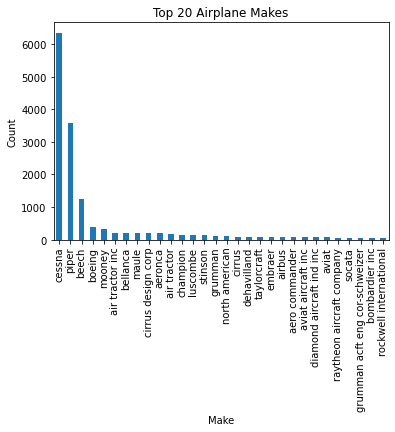

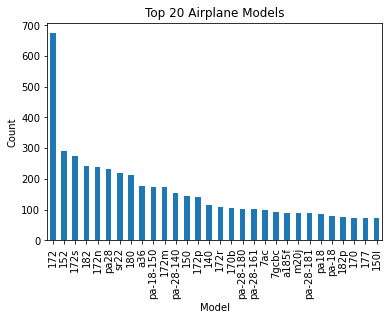

In [42]:
df['make'].value_counts().head(30).plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Top 20 Airplane Makes')
plt.show()  # This will display the plot

df['model'].value_counts().head(30).plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 20 Airplane Models')
plt.show()  # This will display the plot


Visualizing the number of accidents and Incidents:

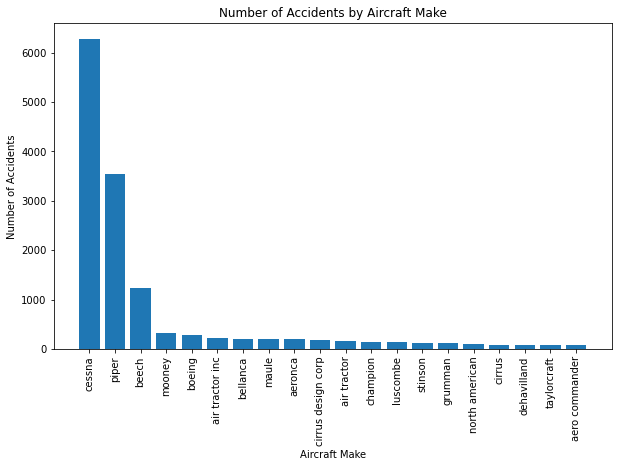

In [43]:
accidents_df = df[df['investigation_type'] == 'Accident']

# Get the counts of each 'make'
counts = accidents_df['make'].value_counts().head(20)

# Get the categories (makes) and their corresponding accident counts
categories = counts.index
accidents = counts.values

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(categories, accidents)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Aircraft Make')
plt.show()



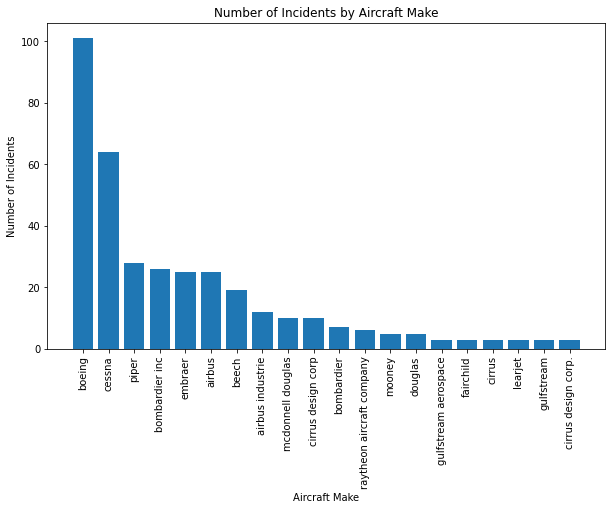

In [44]:
# Filter rows that have 'Incident' in the 'investigation_type' column
incidents_df = df[df['investigation_type'] == 'Incident']

# Get the counts of each 'make'
counts = incidents_df['make'].value_counts().head(20)

# Get the categories (makes) and their corresponding incident counts
categories = counts.index
incidents = counts.values

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(categories, incidents)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents by Aircraft Make')
plt.show()

Cleaning format of values + Filter Out '**amateur_built**' values:

In [45]:
df['amateur_built'] = df['amateur_built'].str.lower()
df = df[df['amateur_built'] == 'no']

In [46]:
df.isna().sum().sort_values(ascending=False)

air_carrier               9356
airport_code              4776
airport_name              4774
total_fatal_injuries      2473
total_serious_injuries    2423
total_minor_injuries      2137
engine_type               1647
number_of_engines          482
total_uninjured            466
weather_condition          425
aircraft_damage            423
injury_severity             81
longitude                   62
latitude                    55
investigation_type           0
event_date                   0
country                      0
state                        0
aircraft_category            0
make                         0
model                        0
amateur_built                0
location                     0
dtype: int64

# **Refining to Commercial Planes Only**

Identifying which **engine_type** is used for commercial planes and filtering accordingly:

Only using **Reciprocating** and **Turbo Fan**:

In [74]:
## Research:
# Reciprocating = Yes; some are / aren't
# Turbo Prop = No
# Turbo Fan = Yes; some are / aren't
# Delete: Unknown, Turbo Shaft, Electric, UNK


df = df[(df['engine_type'] == 'Reciprocating') | (df['engine_type'] == 'Turbo Fan')]
df['engine_type'].value_counts()


Reciprocating    14453
Turbo Fan          636
Name: engine_type, dtype: int64

In [ ]:
list(df['make'].value_counts().index)

Below is a list of the top commercial airplane manufacturers named **commercial_manufacturers**:

In [81]:
commercial_manufacturers = [
    "airbus",
    "boeing",
    "bombardier",
    "embraer",
    "comac",
    "atr",
    "mcdonnell ouglas",
    "mcdonnell",
    "tupolev",
    "ilyushin",
    "sukhoi"
]




In [82]:
mask = df['make'].isin(commercial_manufacturers)
filtered_df = df[mask]
filtered_df['make'].value_counts()

boeing        285
airbus         55
embraer        44
bombardier     18
sukhoi          2
Name: make, dtype: int64

In [83]:
df.head()

,location,investigation_type,event_date,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,...,total_uninjured,total_serious_injuries,total_minor_injuries,weather_condition,airport_code,airport_name,latitude,longitude,amateur_built,state
51955,"milford, ct",Accident,2001-12-30,united states,Fatal(1),Substantial,Airplane,piper,pa-28r-180,1.0,...,NaN,NaN,NaN,VMC,BDR,Igor I. Sikorsky Airport,41.182223,-73.026945,no,ct
52013,"iraan, tx",Accident,2002-01-15,united states,Non-Fatal,Substantial,Airplane,cessna,172,1.0,...,1.0,NaN,NaN,VMC,2F0,Iraan Municipal Airport,30.905556,-101.891944,no,tx
52140,"durango, co",Accident,2002-02-17,united states,Non-Fatal,Substantial,Airplane,cessna,172n,1.0,...,1.0,NaN,NaN,VMC,00C,Animas Air Park,NaN,NaN,no,co
52303,"forrest city, ar",Accident,2002-03-24,united states,Non-Fatal,Substantial,Airplane,cessna,188,1.0,...,1.0,NaN,NaN,VMC,HEE,Thompson-Robbins,35.036666,-90.909444,no,ar
52361,"mount holly, nj",Accident,2002-04-03,united states,Non-Fatal,Substantial,Airplane,cessna,t310r,2.0,...,NaN,1.0,1.0,VMC,VAY,SOUTH JERSEY RGNL,39.942777,-74.845555,no,nj
